In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from asi import (
    draw_multi_crosss,
    get_wavelengths,
    load_spectral_image,
    path_config,
)
from asi.draw import reconstruct_rgb_envi

root = path_config.measurements / "Session1"


In [2]:
spec_path = root / "Specim scanner/Color_checker_8_binning/capture"
! ls "{spec_path}"

DARKREF_solutions_scan_0110.hdr  WHITEREF_solutions_scan_0110.raw
DARKREF_solutions_scan_0110.log  solutions_scan_0110.hdr
DARKREF_solutions_scan_0110.raw  solutions_scan_0110.log
WHITEREF_solutions_scan_0110.hdr solutions_scan_0110.raw
WHITEREF_solutions_scan_0110.log


In [5]:
def print_property(envi_header: dict):
    interleave = envi_header["interleave"]
    samples = envi_header["samples"]
    bands = envi_header["bands"]
    lines = envi_header["lines"]
    # print 4 properties
    print(f"interleave: {interleave.upper()}")
    print(f"lines: {lines}")
    print(f"samples: {samples}")
    print(f"bands: {bands}")

In [6]:
colorchecker_path = spec_path / "solutions_scan_0110"
color_checker, cc_hdr = load_spectral_image(colorchecker_path)
print_property(cc_hdr)

whiteref_path = spec_path / "WHITEREF_solutions_scan_0110"
white_ref, wr_hdr = load_spectral_image(whiteref_path)
print_property(wr_hdr)

darkref_path = spec_path / "DARKREF_solutions_scan_0110"
dark_ref, dr_hdr = load_spectral_image(darkref_path)
print_property(dr_hdr)

interleave: BIL
lines: 1166
samples: 2144
bands: 135
interleave: BIL
lines: 162
samples: 2144
bands: 135
interleave: BIL
lines: 100
samples: 2144
bands: 135


In [7]:
# print shapes of 3
print("color_checker:", color_checker.shape)
print("white_ref:", white_ref.shape)
print("dark_ref:", dark_ref.shape)


color_checker: (1166, 2144, 135)
white_ref: (162, 2144, 135)
dark_ref: (100, 2144, 135)


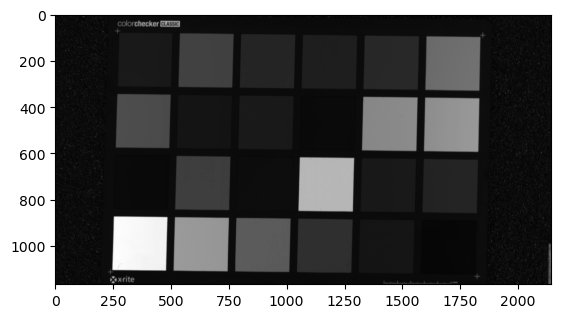

In [8]:
white_ref_mean = white_ref.mean(axis=0)
dark_ref_mean = dark_ref.mean(axis=0)
color_checker_white_clc = (color_checker - dark_ref_mean) / (white_ref_mean - dark_ref_mean)

plt.imshow(color_checker_white_clc[:, :, 50], cmap="gray")

# check memory usage for this step


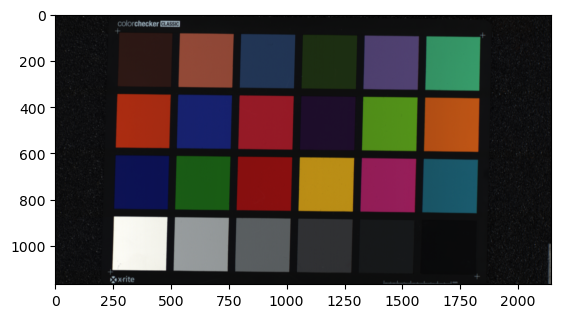

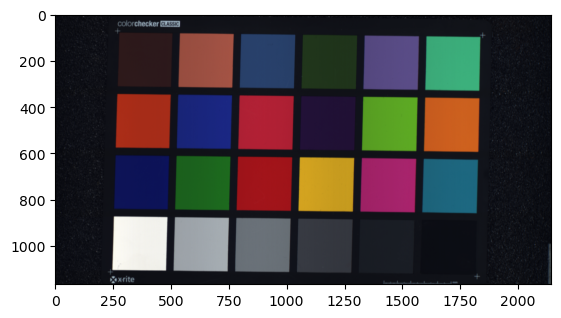

In [ ]:

rgb_view = reconstruct_rgb_envi(color_checker_white_clc, cc_hdr)
plt.imshow(rgb_view)
plt.show()
rgb_view = reconstruct_rgb_envi(color_checker, cc_hdr)
plt.imshow(rgb_view)
plt.show()

Text(0.5, 1.0, 'RGB view of spectral image')

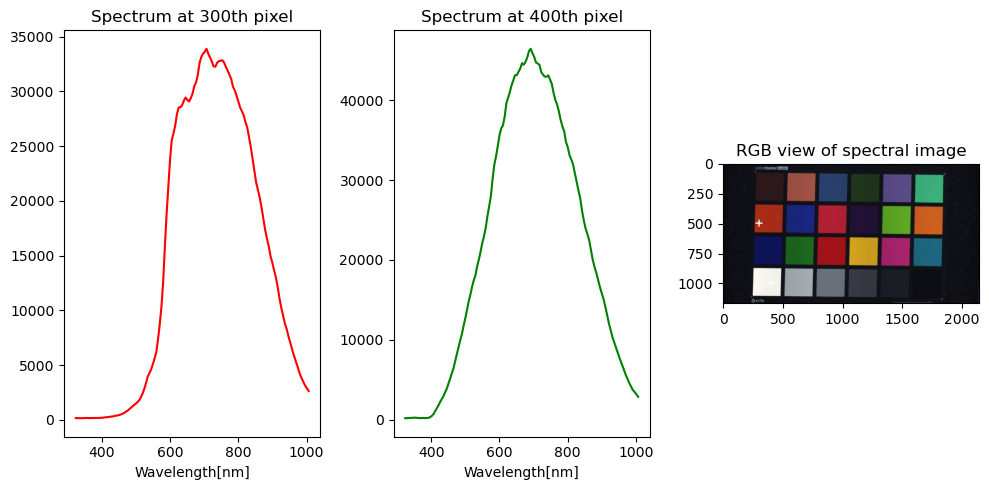

In [47]:
spectral_image = color_checker
envi_header = cc_hdr
# Show spectra
colors = ["r", "g"]
positions = [(300, 500), (400, 1000)]
canvas = draw_multi_crosss(rgb_view, positions)

plt.rcParams["figure.dpi"] = 100
fig, axes = plt.subplots(1, 3, figsize=(10, 5), tight_layout=True)

wavelength = get_wavelengths(envi_header)
for pos, color, ax in zip(positions, colors, axes[:2]):
    ax.plot(wavelength, spectral_image[pos[1], pos[0], :], color=color)
    ax.set_title(f"Spectrum at {pos[0]}th pixel")
    ax.set_xlabel("Wavelength[nm]")

axes[2].imshow(canvas)
axes[2].set_title("RGB view of spectral image")

Text(0.5, 1.0, 'RGB view of spectral image')

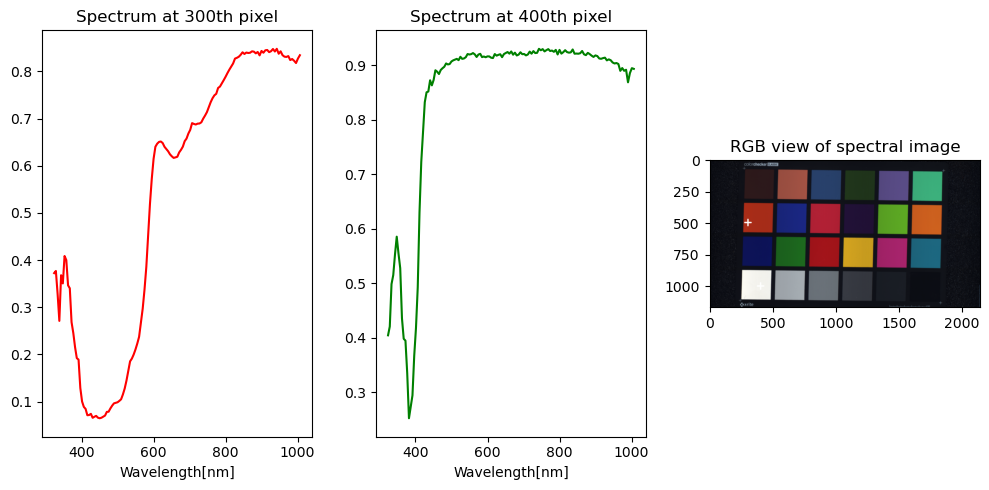

In [48]:
spectral_image = color_checker_white_clc
envi_header = cc_hdr
# Show spectra
colors = ["r", "g"]
positions = [(300, 500), (400, 1000)]
canvas = draw_multi_crosss(rgb_view, positions)

plt.rcParams["figure.dpi"] = 100
fig, axes = plt.subplots(1, 3, figsize=(10, 5), tight_layout=True)

wavelength = get_wavelengths(envi_header)
for pos, color, ax in zip(positions, colors, axes[:2]):
    ax.plot(wavelength, spectral_image[pos[1], pos[0], :], color=color)
    ax.set_title(f"Spectrum at {pos[0]}th pixel")
    ax.set_xlabel("Wavelength[nm]")

axes[2].imshow(canvas)
axes[2].set_title("RGB view of spectral image")